In [48]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [49]:
def load_dataSet():
    dataset = pd.read_csv("CancerData.csv")
    y = dataset.diagnosis
    list = ['id','diagnosis']
    X = dataset.drop(list,axis = 1 )
    return X,y

In [68]:
X,y= load_dataSet()
X.describe()

,radius_2.0ean,texture_2.0ean,peri2.0eter_2.0ean,area_2.0ean,s2.0oothness_2.0ean,co2.0pactness_2.0ean,concavity_2.0ean,concave_points_2.0ean,sy2.02.0etry_2.0ean,fractal_di2.0ension_2.0ean,...,radius_worst,texture_worst,peri2.0eter_worst,area_worst,s2.0oothness_worst,co2.0pactness_worst,concavity_worst,concave_points_worst,sy2.02.0etry_worst,fractal_di2.0ension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [69]:
print(X.shape)

(569, 30)


Data Visualisation for Feature Selection:

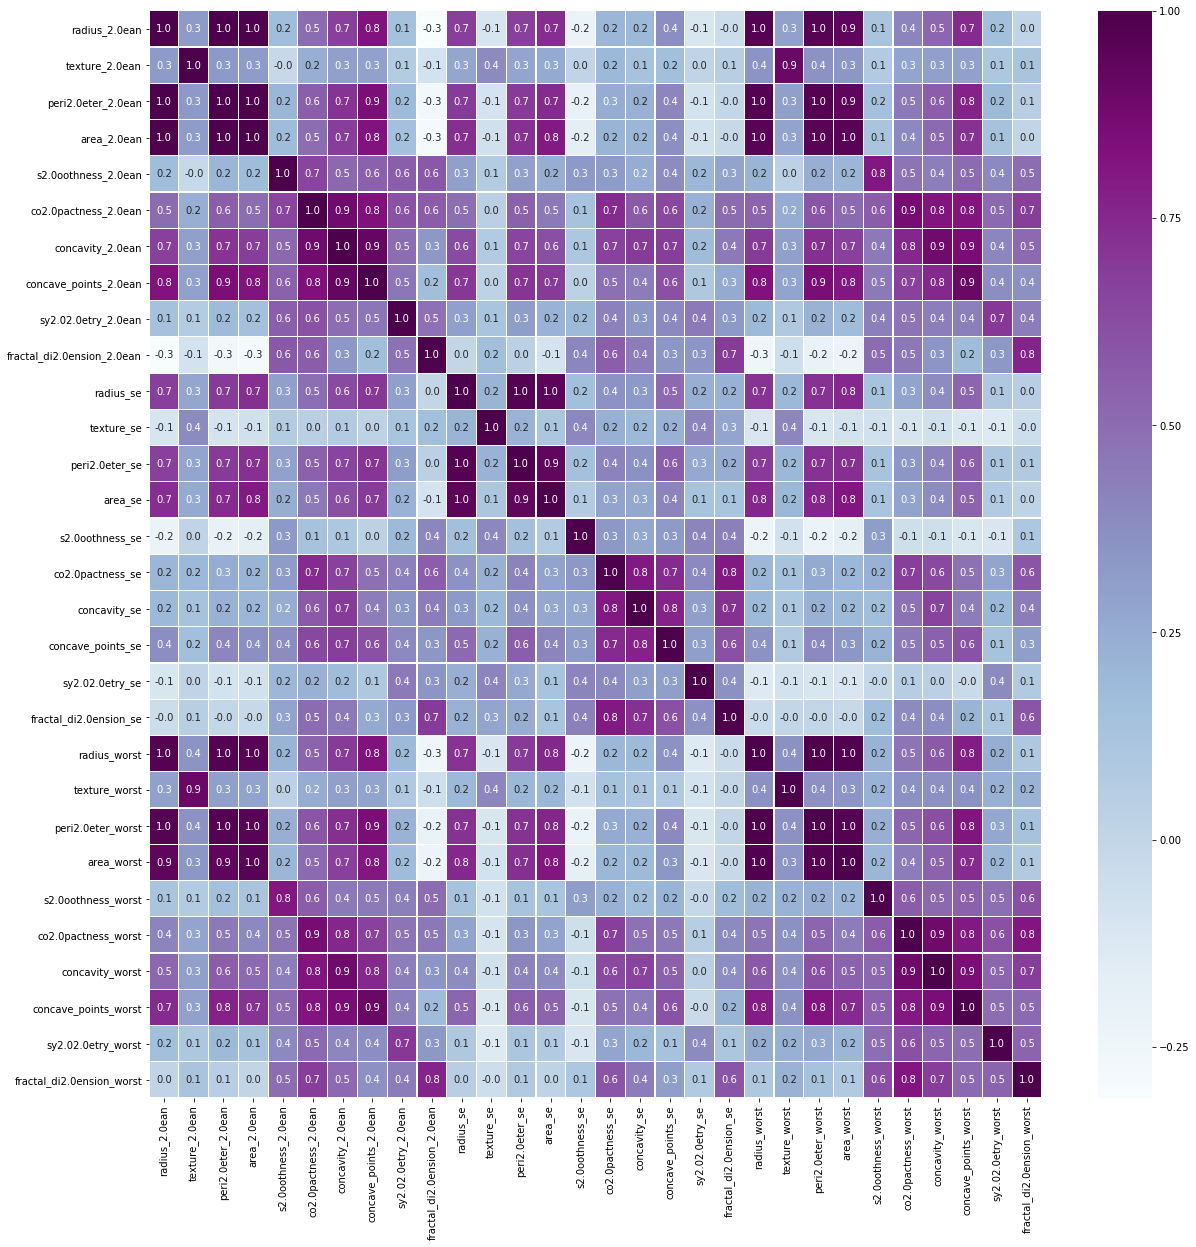

In [64]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.2, fmt= '.1f',ax=ax,cmap="BuPu")

From above matrix, we can see the features that are highly correalted to each other. We will remove the features having greater than 0.8 correlation and use the remaining features to train the model. 


In [52]:
features_to_drop = ['radius_2.0ean','peri2.0eter_2.0ean','co2.0pactness_2.0ean','concave_points_2.0ean','radius_se','peri2.0eter_se','radius_worst','peri2.0eter_worst','co2.0pactness_worst','concave_points_worst','co2.0pactness_se','concave_points_se','texture_worst','area_worst','fractal_di2.0ension_worst','concavity_worst','s2.0oothness_worst','area_se']

In [53]:
def remove_features(X,features_to_drop):
    x_filtered = X.drop(features_to_drop,axis = 1 )
    return x_filtered

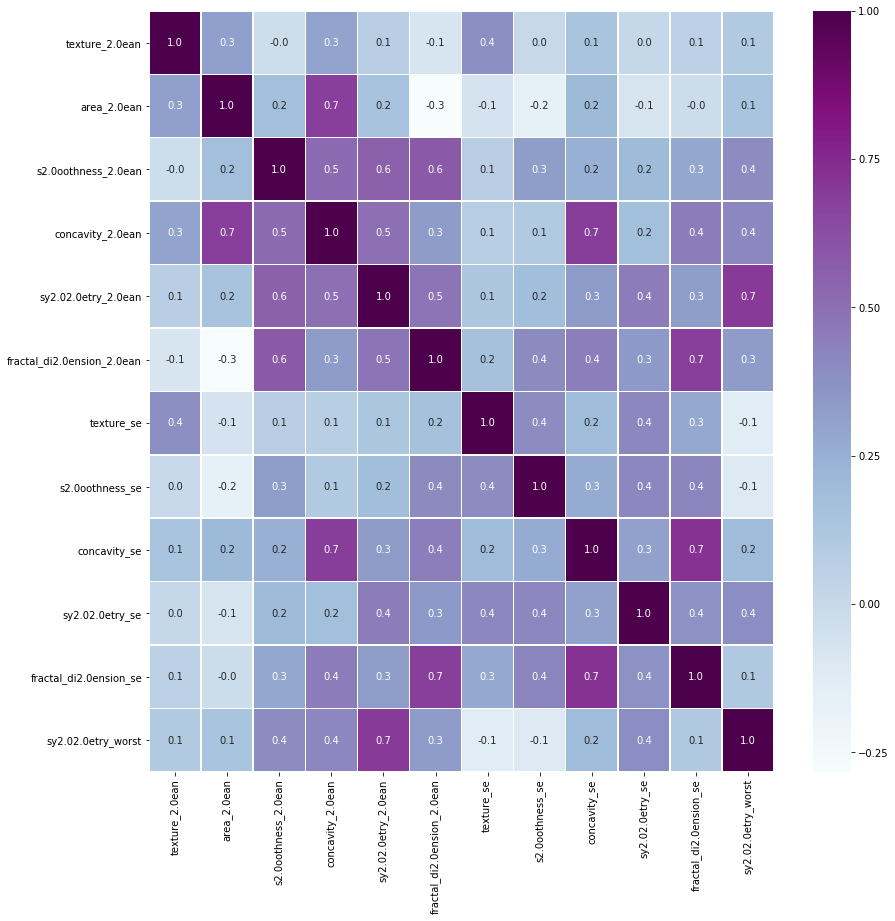

In [65]:
x_filtered= remove_features(X,features_to_drop)
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_filtered.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='BuPu')

In above matrix after filtering the features, we can see that there are no selected features with more than 0.8 correlation. 
We will use these selected features to train our model.

In [55]:
def predict(x, model):
    result= model.predict(x)
    return result

In [80]:
def train():
    
    # split data train 80 % and test 20 %
    x_train, x_test, y_train, y_test = train_test_split(x_filtered, y, test_size=0.2, random_state=42)

    trained_model = RandomForestClassifier()      
    trained_model = trained_model.fit(x_train,y_train)

    y_train_predict=predict(x_train, trained_model)
    y_test_predict=predict(x_test, trained_model)
    
    ac_train = accuracy_score(y_train,y_train_predict)
    ac_test = accuracy_score(y_test,y_test_predict)
    print('Train Accuracy is: ',ac_train)
    print('Test Accuracy is: ',ac_test)

    cm = confusion_matrix(y_test,trained_model.predict(x_test))
    sns.heatmap(cm,annot=True,fmt="d")
    
    f1_sc= f1_score(y_test, y_test_predict, average='macro') 
    print('F1 score is:', f1_sc)
    print('Confusion Matrix:')
    return trained_model

C:\Users\Krati Garg\AppData\Local\conda\conda\envs\tesnsorflow-session\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Accuracy is:  0.9956043956043956
Test Accuracy is:  0.9649122807017544
F1 score is: 0.9605263157894737
Confusion Matrix:


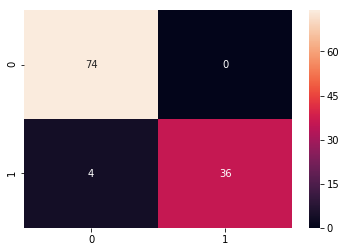

In [81]:
trained_model= train()

Now we can use this trained model to predict the future values.